In [3]:
import sqlalchemy
from sqlalchemy.sql import text
from sqlalchemy.orm import Session
from PeaTMOSS import *
from utils import *
import pandas as pd

In [5]:
df = pd.read_csv("gitRepo_with_actions.csv")
df.head()

,repo url,has_workflow_files,Num_workflow_files,num_test_workflow_files,workflow_files_for_test,has_pyproject,has_setup,has_makefile
0,github.com/NoviScl/GPT3-Reliability,False,0,0,[],False,False,False
1,github.com/ekinakyurek/deprem_openai_apis,True,2,2,"['dev.yml', 'docker-image.yml']",True,False,True
2,github.com/summerstay/Infinite-Adventure,False,0,0,[],False,False,False
3,github.com/MikeGu721/EasyLLM,False,0,0,[],False,False,False
4,github.com/kayoyin/interpret-lm,True,1,0,[],False,False,False


In [6]:
df.describe()

,Num_workflow_files,num_test_workflow_files
count,3300.000000,3300.000000
mean,0.561818,0.513939
std,5.782571,5.534711
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,309.000000,299.000000


In [7]:
total_repos_read = len(df)
total_repos_read

3300

Files having workflows

In [8]:
num_repos_with_actions = df['has_workflow_files'].sum()
print(num_repos_with_actions)


390

In [9]:
total_num_actions = df['Num_workflow_files'].sum()
print(total_num_actions)
total_num_test_actions = df['num_test_workflow_files'].sum()
print(total_num_test_actions)

1854
1696


In [10]:
average_actions = df['Num_workflow_files'].sum()/num_repos_with_actions
average_actions

4.753846153846154

In [11]:
num_repos_with_Test_actions = df['num_test_workflow_files'].apply(lambda x: 1 if x!=0 else 0).sum()
num_repos_with_Test_actions

381

In [13]:
y_axis = ["Repos","Actions","setup.py","Makefile"]

In [29]:
x_axis_num = [len(df) , df['has_workflow_files'].sum(),df['has_setup'].sum(),df['has_makefile'].sum()]
x_axis_percentage = [100 , df['has_workflow_files'].sum()*100/len(df),df['has_setup'].sum()*100/len(df),df['has_makefile'].sum()*100/len(df)]

In [30]:
print(x_axis_num)
print(x_axis_percentage)

[3300, 390, 521, 154]
[100, 11.818181818181818, 15.787878787878787, 4.666666666666667]


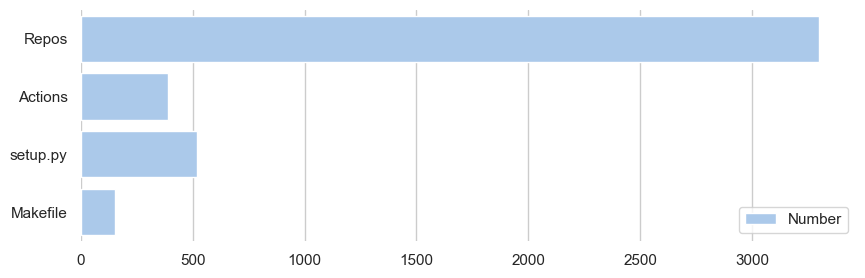

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 3))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=x_axis_num, y=y_axis,label="Number", color="b")

# Plot the crashes where alcohol was involved
#sns.set_color_codes("muted")
#sns.barplot(x=x_axis_percentage, y=y_axis,label="Percentage", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
#ax.set(xlim=(0, 24), ylabel="",xlabel="")
sns.despine(left=True, bottom=True)

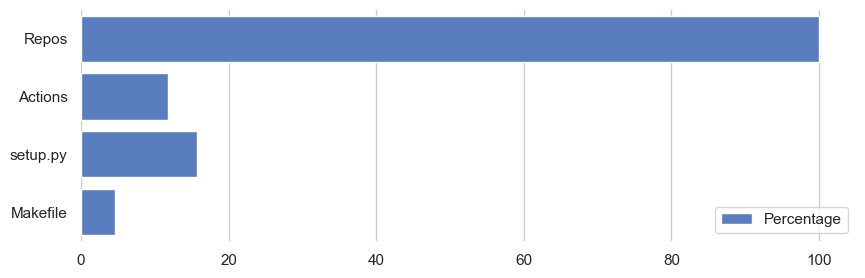

In [32]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 3))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
#sns.set_color_codes("pastel")
#sns.barplot(x=x_axis_num, y=y_axis,label="Number", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x=x_axis_percentage, y=y_axis,label="Percentage", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
#ax.set(xlim=(0, 24), ylabel="",xlabel="")
sns.despine(left=True, bottom=True)